<a href="https://colab.research.google.com/github/NafiseKian/cleaning-robot/blob/main/obj_rec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
config_file= 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model= 'frozen_inference_graph.pb'

In [ ]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)

In [ ]:
classLabels=[]
file_name='labels.txt'
with open(file_name,'rt') as fpt:
    classLabels= fpt.read().rstrip('\n').split('\n')

In [ ]:
import os

file_path = 'frozen_inference_graph.pb'

if os.path.exists(file_path):
    print("File exists.")
else:
    print("File does not exist.")



File exists.


In [ ]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [ ]:
print(len(classLabels))

80


In [ ]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0x7df294194590>

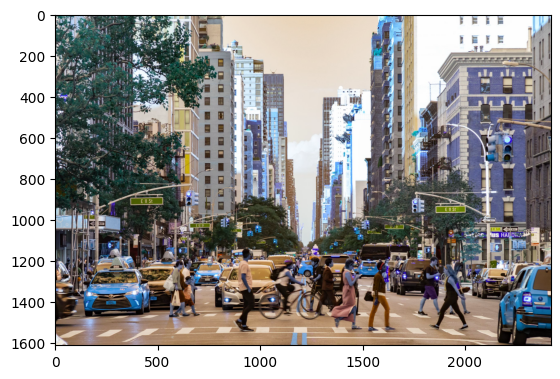

In [ ]:
img=cv2.imread('nyc.jpg')
plt.imshow(img)

In [ ]:
ClassIndex, confidece, bbox= model.detect(img, confThreshold=0.5 )

In [ ]:
print(ClassIndex)

[ 3  3 10  3  2  3  3  1  3  3  1  1 10  1  1  3  3  3 10  3  1  1  3  1
  1  3  1  3  1  3  3  3  1  3 10  3 10]


In [ ]:
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
  cv2.rectangle(img,boxes,(255,0,0),2)
  cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

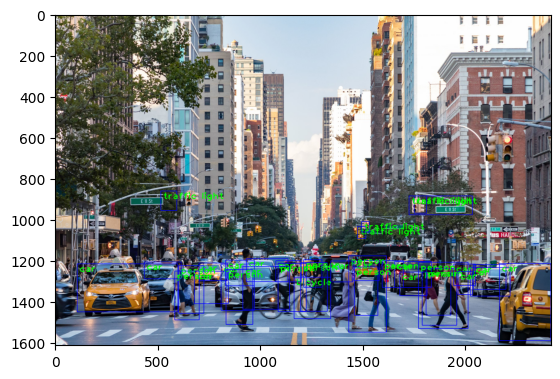

In [ ]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [ ]:
#for webcam
cap=cv2.VideoCapture(1)
if not cap.isOpened():
  cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cant Open The Video")

font_scale=3
font= cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame=cap.read()
    ClassIndex,confidece,bbox=model.detect(frame,confThreshold=0.55)

    print(ClassIndex)

    if(len(ClassIndex)!=0):
      for ClassInd,conf,boxes in zip(ClassIndex.flatten,confidece(),bbox):
        if(ClassInd<=80):
            cv2.rectangle(frame,boxes,(255,0,0),2)
            cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)
    cv2.imshow('obj detection',frame)
    if cv2.waitkey(2) & 0xff==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()



OSError: Cant Open The Video

In [ ]:
# Open the webcam
cap = cv2.VideoCapture(0)

# Check if the webcam is opened successfully
if not cap.isOpened():
    raise IOError("Cannot open webcam")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Perform object detection with YOLOv4
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)
    if len(ClassIndex) != 0:
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassInd <= 80:
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)

    cv2.imshow('Object Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

OSError: Cannot open webcam

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for the Capture to be clicked.
      await new Promise((resolve) => {
        const button = document.createElement('button');
        button.textContent = 'Capture';
        div.appendChild(button);
        button.onclick = () => {
          const canvas = document.createElement('canvas');
          canvas.width = video.videoWidth;
          canvas.height = video.videoHeight;
          canvas.getContext('2d').drawImage(video, 0, 0);
          stream.getVideoTracks()[0].stop();
          div.remove();
          resolve(canvas.toDataURL('image/jpeg', quality));
        };
      });
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  print("Data:", data)  # Print the data variable for debugging
  if data is not None:
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
      f.write(binary)
    return filename
  else:
    print("Failed to capture photo from webcam.")

# Execute the take_photo() function to access the webcam and capture a photo
take_photo()


<IPython.core.display.Javascript object>

Data: None
Failed to capture photo from webcam.
